In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-walking-dead-episodes/walking_dead_episodes_imdb.csv
/kaggle/input/the-walking-dead-episodes/walking_dead_episodes_2.csv
/kaggle/input/the-walking-dead-episodes/walking_dead_episodes_rotten-tomatoes.csv


# **Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [3]:
episodes_df = pd.read_csv('../input/the-walking-dead-episodes/walking_dead_episodes_2.csv', parse_dates=['Original Air date'],encoding='latin-1')
imdb_df = pd.read_csv('../input/the-walking-dead-episodes/walking_dead_episodes_imdb.csv', parse_dates=['air date'],encoding='latin-1')
rotten_tomatoes_df = pd.read_csv('../input/the-walking-dead-episodes/walking_dead_episodes_rotten-tomatoes.csv',encoding='latin-1')

episodes_df.head()

,Season,Episode,Episode(overall),Title,Directed by,Written by,Original Air date,US viewers(millions)
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,2010-10-31,5.35
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,2010-11-07,4.71
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudice & ...,2010-11-14,5.07
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,2010-11-21,4.75
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,2010-11-28,5.56


In [4]:
rotten_tomatoes_df.head()

,season,episode,episode(overall),title,rotten_tomato_score
0,1,1,1,Days Gone Bye,100%
1,1,2,2,Guts,75%
2,1,3,3,Tell It to the Frogs,92%
3,1,4,4,Vatos,91%
4,1,5,5,Wildfire,91%


In [5]:
episodes_df = episodes_df.rename(columns={'Title': 'title', 'Original Air date': 'air date'})
episodes_df.head()

,Season,Episode,Episode(overall),title,Directed by,Written by,air date,US viewers(millions)
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,2010-10-31,5.35
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,2010-11-07,4.71
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudice & ...,2010-11-14,5.07
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,2010-11-21,4.75
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,2010-11-28,5.56


# **Merge Imdb & Episodes datasets**

In [6]:
# Only keep relevant columns from the IMDb dataset to avoid duplication.
imdb_df = imdb_df[['title', 'air date', 'rating', 'votes', 'description']]
twd_df = episodes_df.merge(imdb_df, how='left', on=['title','air date'])
twd_df.head()

,Season,Episode,Episode(overall),title,Directed by,Written by,air date,US viewers(millions),rating,votes,description
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,2010-10-31,5.35,9.2,"24,447",Deputy Sheriff Rick Grimes awakens from a coma...
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,2010-11-07,4.71,8.6,"15,455","In Atlanta, Rick is rescued by a group of surv..."
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudice & ...,2010-11-14,5.07,8.2,"14,158",Rick is reunited with Lori and Carl but soon d...
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,2010-11-21,4.75,8.5,"13,831","Rick, Glenn, Daryl and T-Dog come across a gro..."
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,2010-11-28,5.56,8.1,"13,292","After the attack on the camp, Rick leads the s..."


# **Change 'votes' column from string to float**

In [7]:
twd_df['votes'] = twd_df['votes'].str.replace(',', '').astype(float)

In [8]:
twd_df.votes

0      24447.0
1      15455.0
2      14158.0
3      13831.0
4      13292.0
        ...   
164        NaN
165        NaN
166        NaN
167        NaN
168        NaN
Name: votes, Length: 169, dtype: float64

# **Visualization**

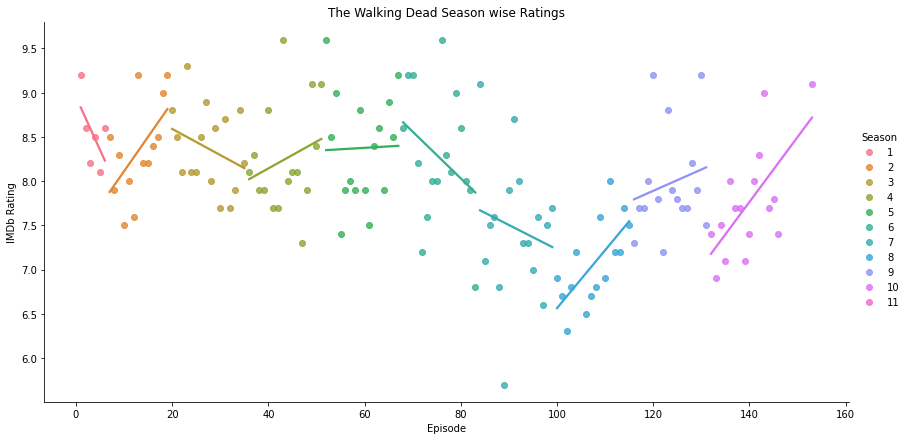

In [9]:
sns.lmplot(x="Episode(overall)", y="rating", hue="Season", data=twd_df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("IMDb Rating")
plt.title("The Walking Dead Season wise Ratings");

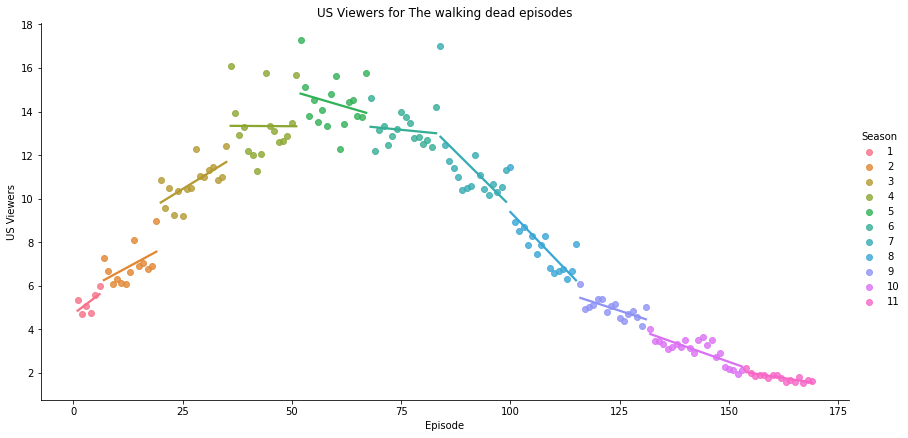

In [10]:
sns.lmplot(x="Episode(overall)", y="US viewers(millions)", hue="Season", data=twd_df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("US Viewers")
plt.title("US Viewers for The walking dead episodes")
plt.ticklabel_format(style='plain', axis='y');

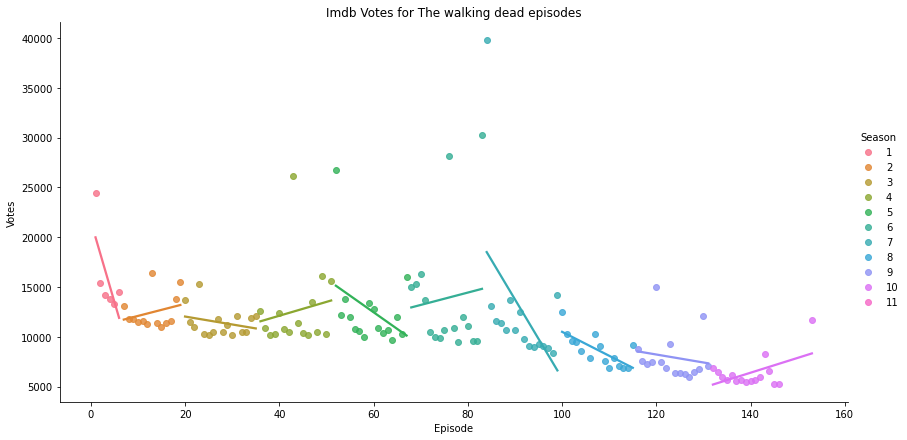

In [11]:
sns.lmplot(x="Episode(overall)", y="votes", hue="Season", data=twd_df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("Votes")
plt.title("Imdb Votes for The walking dead episodes")
plt.ticklabel_format(style='plain', axis='y');

# **Rotten tomatoes score dataset column datatype conversion and visualization**

In [12]:
rotten_tomatoes_df['rotten_tomato_score'] = rotten_tomatoes_df['rotten_tomato_score'].str.replace('%', '').astype(float)

In [13]:
print(rotten_tomatoes_df['rotten_tomato_score'])

0      100.0
1       75.0
2       92.0
3       91.0
4       91.0
       ...  
164     86.0
165     86.0
166    100.0
167     83.0
168     75.0
Name: rotten_tomato_score, Length: 169, dtype: float64


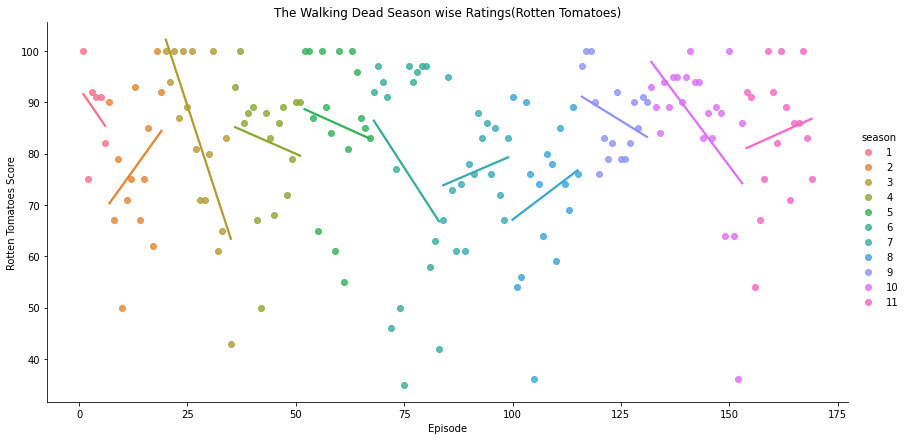

In [14]:
sns.lmplot(x="episode(overall)", y="rotten_tomato_score", hue="season", data=rotten_tomatoes_df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("Rotten Tomatoes Score")
plt.title("The Walking Dead Season wise Ratings(Rotten Tomatoes)");